## 1. Import Libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## 2. Load the Dataset

In [2]:
df = pd.read_csv('SalesData - Raw.csv')
df.head(20)

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region
0,2000,Culture Max,Furniture,440.82,3.0,1322.46,Michelle Lin,4/23/2023,NaN,West
1,2001,Medical Classic,Home Decor,175.05,4.0,700.20,Julie Carter,9/3/2023,NaN,South
2,2002,Ability Classic,Electronics,-375.40,3.0,1126.20,Miranda Wells,9/18/2023,NaN,West
3,2003,Piece Plus,Electronics,435.17,NaN,NaN,Michael Dunlap,6/28/2024,NaN,South
4,2004,Your Classic,Furniture,-949.11,2.0,1898.22,Michelle Smith,6/19/2023,NaN,North
5,2005,Western Lite,Sports,80.92,1.0,80.92,Kyle Moody PhD,9/7/2023,7%,South
6,2006,With Max,Electronics,455.06,4.0,1820.24,Robin Wood,3/6/2023,24%,East
7,2007,Let Max,Sports,31.56,2.0,63.12,Jasmine Mayer,8/10/2024,9%,East
8,2008,Among Max,Electronics,50.91,4.0,203.64,NaN,1/27/2023,NaN,South
9,2009,Challenge Lite,Apparel,33.24,3.0,99.72,Thomas Schneider,1/21/2023,NaN,West


## 3. Data Preprocessing

In [3]:
df.describe()

,Order_ID,Price,Quantity,Total_Price
count,1000.000000,1000.000000,806.000000,806.000000
mean,2499.500000,197.918730,2.509926,546.447382
std,288.819436,248.939969,1.089430,669.480357
min,2000.000000,-949.110000,1.000000,6.270000
25%,2249.750000,39.457500,2.000000,110.340000
50%,2499.500000,129.955000,2.000000,307.450000
75%,2749.250000,274.750000,3.000000,726.870000
max,2999.000000,998.440000,4.000000,3860.520000


In [4]:
# Overview the data types and null values
print(df.info)

<bound method DataFrame.info of      Order_ID      Product_Name     Category   Price  Quantity  Total_Price  \
0        2000       Culture Max    Furniture  440.82       3.0      1322.46   
1        2001   Medical Classic   Home Decor  175.05       4.0       700.20   
2        2002   Ability Classic  Electronics -375.40       3.0      1126.20   
3        2003        Piece Plus  Electronics  435.17       NaN          NaN   
4        2004      Your Classic    Furniture -949.11       2.0      1898.22   
..        ...               ...          ...     ...       ...          ...   
995      2995      Industry Pro       Sports  159.36       1.0       159.36   
996      2996  Consider Classic       Sports  106.97       1.0       106.97   
997      2997           Lay Pro      Apparel   41.61       2.0        83.22   
998      2998        Field Lite    Furniture  906.29       1.0       906.29   
999      2999   Against Classic    Furniture  337.80       NaN          NaN   

       Customer_Nam

### 3.1 Missing Value

In [5]:
# Check the number of missing values for each column
df.isnull().sum()

Order_ID           0
Product_Name       0
Category           0
Price              0
Quantity         194
Total_Price      194
Customer_Name     60
Date               0
Discount         687
Region            40
dtype: int64

> #### **💡 Explanation:**  
> There are several missing values in the dataset. The columns include:
> * Quantity
> * Total_Price
> * Customer_Name
> * Discount
> * Region

#### 3.1.1 Region
To handle the missing values in Region, here are the steps:
* First, fill missing regions based on the same product sold in the same region
* Second, if there are no products with the same name, fill remaining missing values with the mode (modus) of each category

In [6]:
# FIRST HANDLING METHOD
# 
# Check if there are products with the same name as the missing value
# If said product has the region column filled, use that sama region to fill our missing data
def fill_region(row, region_map):
    if pd.isna(row['Region']):
        product_name = row['Product_Name']
        if product_name in region_map:
            return region_map[product_name]
    return row['Region']

In [7]:
# Map product names to their most frequent region
region_map = (df.dropna(subset=['Region'])
              .groupby('Product_Name')['Region']
              .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
              .to_dict())

df['Region'] = df.apply(lambda row: fill_region(row, region_map), axis=1)

print(f"Missing values in 'Region': {df['Region'].isna().sum()}")

Missing values in 'Region': 33


> #### **💡 Explanation:**  
> As we can see here, the missing values in Region has been reduced from 40 to 33. Which means that we have successfully filled in 7 products using the first method

In [8]:
# SECOND HANDLING METHOD
#
# Fill in the remaining missing values with the mode (modus) of each category
df['Region'] = df.groupby('Category')['Region'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

print(f"Missing values in 'Region': {df['Region'].isna().sum()}")

Missing values in 'Region': 0


#### 3.1.2 Customer_Name
In order to fill in the missing value of this column, we have to understand the pattern of the data first by visualizing it.

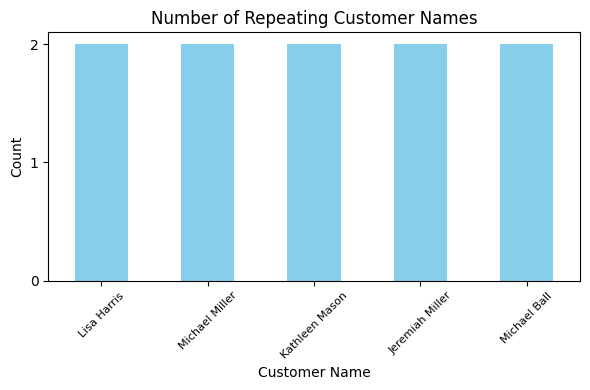

In [9]:
# Visualize the number of repeating customer names who purchased more than once
customer_counts = df['Customer_Name'].value_counts()
repeating_customers = customer_counts[customer_counts > 1]

# Sort by the most frequent to least frequent purchases
repeating_customers = repeating_customers.sort_values(ascending=False)

plt.figure(figsize=(6, 4))
repeating_customers.plot(kind='bar', color='skyblue')
plt.title('Number of Repeating Customer Names')
plt.xlabel('Customer Name')
plt.ylabel('Count')
plt.yticks(range(0, repeating_customers.max() + 1))
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

> #### **💡 Explanation:**  
> Based on the chart above, only 5 customers made multiple purchases, which indicates that the remaining customers are unique (each purchased only once or at most twice).
>
> This insight is particularly useful for handling the missing values in the customer_name column. Instead of replacing the missing names with a generic placeholder like 'Customer', which could create outliers (suggesting that these customers made multiple purchases), we will assign unique identifiers to maintain data consistency.
>
> **Solution:**  
> We will fill the missing values using a sequential naming approach, such as 'Customer 1', 'Customer 2', 'Customer 3', and so on. This method ensures the dataset remains representative of the observed purchasing behavior.

In [10]:
# Initialize Counter
customer_counter = 1

# Replace missing or numeric values with 'Customer {n}'
for idx in range(len(df)):
    value = df.at[idx, 'Customer_Name']

    # Check missing and numeric value
    if pd.isnull(value) or value.isdigit():
        df.at[idx, 'Customer_Name'] = f'Customer {customer_counter}'  # Replace with 'Customer {n}'
        customer_counter += 1  # Increment the counter for the next missing or numeric value

# Verify the changes
print(df['Customer_Name'].head(20))  # Preview the column
print(f"Missing values in 'Customer_Name': {df['Customer_Name'].isna().sum()}")

0          Michelle Lin
1          Julie Carter
2         Miranda Wells
3        Michael Dunlap
4        Michelle Smith
5        Kyle Moody PhD
6            Robin Wood
7         Jasmine Mayer
8            Customer 1
9      Thomas Schneider
10       Katherine Howe
11           Maria Soto
12           Customer 2
13          Daisy Mills
14        Heather Estes
15         Lisa Johnson
16    Alyssa Villarreal
17        Kathryn Banks
18         Michael West
19        Kelly Russell
Name: Customer_Name, dtype: object
Missing values in 'Customer_Name': 0


#### 3.1.3 Quantity
The amount of missing values in the 'Quantity' and  'Total_Price' columns are the same. First, we should analyze if the missing values in 'Total_Price' are only missing when the 'Quantity' is also null, and vice versa.

In [11]:
# Check if the missing values in 'Total_Price' are only missing when 'Quantity' is missing and vice versa
missing_total_price = df['Total_Price'].isna()
missing_quantity = df['Quantity'].isna()

# Verify the conditions
condition_qty_tp = missing_total_price.equals(missing_quantity)
print(f"Are missing values in 'Total_Price' only missing when 'Quantity' is missing (and vice versa)? {condition_qty_tp}")

Are missing values in 'Total_Price' only missing when 'Quantity' is missing (and vice versa)? True


To handle the missing values, we will calculate the average quantity based on the 'Category', as well as the month and year extracted from the 'Date' column. Before proceeding, it is essential to ensure that the 'Date' column is formatted consistently. This step guarantees accurate grouping and calculation of averages.

In [12]:
if 'Date' in df.columns:
    # Convert the 'Date' column to datetime, coercing invalid values to NaT
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Check for invalid dates
    invalid_date_rows = df['Date'].isna()
    invalid_count = invalid_date_rows.sum()
    print(f"Number of invalid date formats: {invalid_count}")
    
    # Details of invalid date values
    invalid_values = df.loc[invalid_date_rows, 'Date']
    print("Details of invalid date values:")
    print(invalid_values)
    
    print("Updated DataFrame with invalid dates replaced:")
else:
    print("The 'Date' column is not present in the dataset.")

Number of invalid date formats: 51
Details of invalid date values:
23    NaT
31    NaT
39    NaT
50    NaT
106   NaT
116   NaT
143   NaT
159   NaT
160   NaT
169   NaT
185   NaT
207   NaT
254   NaT
283   NaT
352   NaT
353   NaT
357   NaT
398   NaT
404   NaT
419   NaT
420   NaT
436   NaT
490   NaT
509   NaT
534   NaT
553   NaT
557   NaT
561   NaT
594   NaT
604   NaT
608   NaT
612   NaT
617   NaT
636   NaT
697   NaT
772   NaT
774   NaT
785   NaT
790   NaT
793   NaT
800   NaT
804   NaT
849   NaT
869   NaT
914   NaT
946   NaT
948   NaT
955   NaT
958   NaT
964   NaT
981   NaT
Name: Date, dtype: datetime64[ns]
Updated DataFrame with invalid dates replaced:


> #### **💡 Explanation:**  
> As we can see here, there are 51 rows of data with the value 'Invalid' instead of having different date formats. For now, we will let it be since we do not have enough data to predict when the purchase could happen.


Next, we extract the month and year from the 'Date' column to calculate the average quantity.

In [13]:
# Extract 'Month' and 'Year' from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Convert the 'Month' and 'Year' to integer to remove decimals
df['Year'] = df['Year'].astype('Int64')
df['Month'] = df['Month'].astype('Int64')

# Group by 'Category', 'Year', and 'Month' and calculate the average quantity
average_quantity_calculation = df.groupby(['Category', 'Year', 'Month'])['Quantity'].mean().round().reset_index()

# Rename the column for clarity
average_quantity_calculation = average_quantity_calculation.rename(columns={'Quantity': 'Average_Quantity'})

# Display the result
print(average_quantity_calculation.head())


  Category  Year  Month  Average_Quantity
0  Apparel  2022     12               3.0
1  Apparel  2023      1               3.0
2  Apparel  2023      2               3.0
3  Apparel  2023      3               2.0
4  Apparel  2023      4               3.0


Once we have calculated the average quantity based on the category, month, and year, we will use these results to fill the missing values in the original 'Quantity' column.

In [14]:
# Merge the average quantity back to the original DataFrame
df = df.merge(average_quantity_calculation, on=['Category', 'Year', 'Month'], how='left', suffixes=('', '_Avg'))

# Fill missing 'Quantity' values with the rounded 'Average_Quantity'
df['Quantity'] = df['Quantity'].fillna(df['Average_Quantity'])

# Drop the helper column 'Average_Quantity'
df = df.drop(columns=['Average_Quantity'])

In [15]:
# Convert 'Quantity' to integer to remove decimals
df['Quantity'] = df['Quantity'].astype('Int64')

# Verify the result
print(df[['Category', 'Year', 'Month', 'Quantity']].head())

      Category  Year  Month  Quantity
0    Furniture  2023      4         3
1   Home Decor  2023      9         4
2  Electronics  2023      9         3
3  Electronics  2024      6         3
4    Furniture  2023      6         2


In [16]:
# Verify missing values
print(df[df['Quantity'].isna()])

     Order_ID      Product_Name     Category   Price  Quantity  Total_Price  \
169      2169      Million Lite      Apparel   31.46      <NA>          NaN   
420      2420  Probably Classic       Sports  291.23      <NA>          NaN   
561      2561        Summer Max       Sports -254.59      <NA>          NaN   
608      2608    Little Classic   Home Decor  192.83      <NA>          NaN   
612      2612          Land Max    Furniture  768.00      <NA>          NaN   
636      2636         Break Max   Home Decor   21.15      <NA>          NaN   
800      2800      None Classic      Apparel   21.06      <NA>          NaN   
804      2804        Happen Max  Electronics   63.40      <NA>          NaN   

       Customer_Name Date Discount Region  Month  Year  
169   Brianna Zavala  NaT      28%   West   <NA>  <NA>  
420  Andrea Hamilton  NaT      13%  North   <NA>  <NA>  
561      Jose Gibson  NaT      29%   East   <NA>  <NA>  
608        Lisa Cobb  NaT       6%   West   <NA>  <NA>  
612

> #### **💡 Explanation:**  
> Based on the output above, there are still 8 missing values in the 'Quantity' column. This is due to the absence of the date, which prevents us from extracting the month and year for those products.
>
> To handle this, we will use the 'Category' column to determine the mode (most frequent value) of the 'Quantity' for that product and fill in the missing values accordingly.

In [17]:
# For each category, find the mode (most frequent value) of the 'Quantity' column
category_mode = df.groupby('Category')['Quantity'].apply(lambda x: x.mode()[0])

# Fill missing 'Quantity' based on category mode
def fill_missing_quantity(row):
    if pd.isna(row['Quantity']):
        return category_mode[row['Category']]
    return row['Quantity']
df['Quantity'] = df.apply(fill_missing_quantity, axis=1)

# Verify missing values
print(df[df['Quantity'].isna()])

Empty DataFrame
Columns: [Order_ID, Product_Name, Category, Price, Quantity, Total_Price, Customer_Name, Date, Discount, Region, Month, Year]
Index: []


#### 3.1.4 Price

In [18]:
missing_price = df[df['Price'].isnull()]
missing_price

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year


In the 'Price' column, there are no missing values, but there are negative values that need to be addressed. The first step is to identify these negative values.

In [19]:
negative_price_count = (df['Price'] < 0).sum()
print(f"Number of rows with negative 'Price' values: {negative_price_count}")

negative_price = df[df['Price'] < 0]
negative_price

Number of rows with negative 'Price' values: 55


,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
2,2002,Ability Classic,Electronics,-375.40,3,1126.20,Miranda Wells,2023-09-18,NaN,West,9,2023
4,2004,Your Classic,Furniture,-949.11,2,1898.22,Michelle Smith,2023-06-19,NaN,North,6,2023
25,2025,Investment Classic,Home Decor,-81.33,2,162.66,Sarah Kelley,2024-02-07,NaN,South,2,2024
85,2085,Hit Plus,Furniture,-518.92,4,2075.68,Michelle Elliott,2024-09-16,NaN,North,9,2024
105,2105,Upon Classic,Home Decor,-12.12,3,36.36,Jessica Hunter,2024-09-05,NaN,North,9,2024
116,2116,Single Classic,Home Decor,-58.30,2,116.60,Bruce Hall,NaT,NaN,North,<NA>,<NA>
122,2122,Another Classic,Home Decor,-142.70,2,285.40,James Grant,2024-02-07,NaN,East,2,2024
158,2158,Property Pro,Electronics,-305.12,1,305.12,Donald Cruz,2024-01-09,3%,South,1,2024
161,2161,As Classic,Apparel,-24.44,1,24.44,Customer 16,2024-06-10,NaN,South,6,2024
196,2196,Answer Pro,Sports,-154.77,3,464.31,Michael Miller,2024-07-16,NaN,East,7,2024


> #### **💡 Explanation:**  
> There are 55 rows with negative values in the 'Price' column. To handle these rows, we can use two methods:
> * **Method 1:**  
> Check if there are other rows with the same product name but with a positive price. If such rows exist, we will replace the negative price with the matching positive price.
> * **Method 2:**  
> For rows that do not have a matching product name, we will convert the negative price to its absolute value (i.e., change the sign from negative to positive without altering the magnitude).

In [20]:
# FIRST METHOD
# Initialize counters
valid_price_count = 0
no_valid_price_count = 0

# Step 2: Loop through rows with negative 'Price'
for index, row in negative_price.iterrows():
    # Check if there are other products with the same 'Product_Name'
    matching_products = df[df['Product_Name'] == row['Product_Name']]
    
    # Filter matching products for valid prices
    valid_prices = matching_products[matching_products['Price'] > 0]['Price']
    
    # Check if there are any valid prices available
    if not valid_prices.empty:
        # Get the first valid price
        valid_price = valid_prices.iloc[0]
        
        # Fill the negative price with the valid price
        df.at[index, 'Price'] = valid_price
        
        # Increment the valid price counter
        valid_price_count += 1
    else:
        # Increment the no valid price counter
        no_valid_price_count += 1

# Output the counts
print(f"Number of products with valid prices filled: {valid_price_count}")
print(f"Number of products with no valid price found: {no_valid_price_count}")

# Verify the result
df.head(20)


Number of products with valid prices filled: 11
Number of products with no valid price found: 44


,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
0,2000,Culture Max,Furniture,440.82,3,1322.46,Michelle Lin,2023-04-23,NaN,West,4,2023
1,2001,Medical Classic,Home Decor,175.05,4,700.20,Julie Carter,2023-09-03,NaN,South,9,2023
2,2002,Ability Classic,Electronics,11.21,3,1126.20,Miranda Wells,2023-09-18,NaN,West,9,2023
3,2003,Piece Plus,Electronics,435.17,3,NaN,Michael Dunlap,2024-06-28,NaN,South,6,2024
4,2004,Your Classic,Furniture,-949.11,2,1898.22,Michelle Smith,2023-06-19,NaN,North,6,2023
5,2005,Western Lite,Sports,80.92,1,80.92,Kyle Moody PhD,2023-09-07,7%,South,9,2023
6,2006,With Max,Electronics,455.06,4,1820.24,Robin Wood,2023-03-06,24%,East,3,2023
7,2007,Let Max,Sports,31.56,2,63.12,Jasmine Mayer,2024-08-10,9%,East,8,2024
8,2008,Among Max,Electronics,50.91,4,203.64,Customer 1,2023-01-27,NaN,South,1,2023
9,2009,Challenge Lite,Apparel,33.24,3,99.72,Thomas Schneider,2023-01-21,NaN,West,1,2023


> #### **💡 Explanation:**  
> As shown above, using the first method, we successfully filled 11 out of the 55 rows with negative prices. We will now proceed to apply the second method for the remaining rows.

In [21]:
# SECOND METHOD
# Convert the negative price values to absolute values (positive)
df['Price'] = df['Price'].abs()
df.head(5)

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
0,2000,Culture Max,Furniture,440.82,3,1322.46,Michelle Lin,2023-04-23,NaN,West,4,2023
1,2001,Medical Classic,Home Decor,175.05,4,700.20,Julie Carter,2023-09-03,NaN,South,9,2023
2,2002,Ability Classic,Electronics,11.21,3,1126.20,Miranda Wells,2023-09-18,NaN,West,9,2023
3,2003,Piece Plus,Electronics,435.17,3,NaN,Michael Dunlap,2024-06-28,NaN,South,6,2024
4,2004,Your Classic,Furniture,949.11,2,1898.22,Michelle Smith,2023-06-19,NaN,North,6,2023


In [22]:
print(df[df['Price'].isnull()])

Empty DataFrame
Columns: [Order_ID, Product_Name, Category, Price, Quantity, Total_Price, Customer_Name, Date, Discount, Region, Month, Year]
Index: []


In [23]:
df.isnull().sum()

Order_ID           0
Product_Name       0
Category           0
Price              0
Quantity           0
Total_Price      194
Customer_Name      0
Date              51
Discount         687
Region             0
Month             51
Year              51
dtype: int64

#### 3.1.5 Total Price
Since we have filled in all the missing values in the 'Price' and 'Quantity' columns, we can now calculate the missing values in the 'Total_Price' column by multiplying 'Price' and 'Quantity'.

In [24]:
# Fill in the missing values in 'Total_Price' by multiplying the 'Price' and 'Quantity'
df['Total_Price'] = df['Total_Price'].fillna(df['Price'] * df['Quantity'])
print(df[df['Total_Price'].isnull()])

Empty DataFrame
Columns: [Order_ID, Product_Name, Category, Price, Quantity, Total_Price, Customer_Name, Date, Discount, Region, Month, Year]
Index: []


Now, we need to verify that every row in the 'Total_Price' column is calculated by multiplying 'Quantity' and 'Price'. We will display the rows where the 'Total_Price' does not match the result of this multiplication.

In [25]:
df['Calculated_Total_Price'] = df['Price'] * df['Quantity']
mismatch_rows = df[df['Total_Price'].round(2) != df['Calculated_Total_Price'].round(2)]

# Display the mismatched rows
mismatch_count = mismatch_rows.shape[0]
print(f"Number of rows with mismatched Total_Price: {mismatch_count}")

mismatch_rows

Number of rows with mismatched Total_Price: 36


,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year,Calculated_Total_Price
2,2002,Ability Classic,Electronics,11.21,3,1126.20,Miranda Wells,2023-09-18,NaN,West,9,2023,33.63
16,2016,Local Lite,Apparel,27.70,4,177.16,Alyssa Villarreal,2023-07-06,NaN,East,7,2023,110.80
73,2073,Town Pro,Electronics,286.44,4,2084.18,Cheryl Lyons,2024-09-08,14%,South,9,2024,1145.76
99,2099,Form Classic,Apparel,34.21,3,191.01,Rita Austin,2024-01-24,NaN,East,1,2024,102.63
106,2106,Into Lite,Electronics,388.10,3,1886.46,Customer 10,NaT,NaN,West,<NA>,<NA>,1164.30
116,2116,Single Classic,Home Decor,365.43,2,116.60,Bruce Hall,NaT,NaN,North,<NA>,<NA>,730.86
143,2143,The Classic,Apparel,28.49,4,212.87,Aaron West,NaT,NaN,South,<NA>,<NA>,113.96
153,2153,Sit Classic,Sports,129.90,2,476.60,Customer 15,2024-10-28,NaN,West,10,2024,259.80
161,2161,As Classic,Apparel,64.12,1,24.44,Customer 16,2024-06-10,NaN,South,6,2024,64.12
196,2196,Answer Pro,Sports,35.16,3,464.31,Michael Miller,2024-07-16,NaN,East,7,2024,105.48


> #### **💡 Explanation:**  
> Based on the output above, there are 36 rows where the 'total_price' does not match the expected calculation of multiplying 'quantity' and 'price'. After further analysis, we found no correlation between the discrepancies and any potential discounts that might have reduced the 'total_price'.
>
> To address this, we have decided to document these discrepancies and replace the 'total_price' values with the results of our own calculation.

In [26]:
df = df.drop(columns=['Calculated_Total_Price'])
df.loc[mismatch_rows.index, 'Total_Price'] = df.loc[mismatch_rows.index, 'Price'] * df.loc[mismatch_rows.index, 'Quantity']

# Verify the changes
df.loc[mismatch_rows.index]

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
2,2002,Ability Classic,Electronics,11.21,3,33.63,Miranda Wells,2023-09-18,NaN,West,9,2023
16,2016,Local Lite,Apparel,27.70,4,110.80,Alyssa Villarreal,2023-07-06,NaN,East,7,2023
73,2073,Town Pro,Electronics,286.44,4,1145.76,Cheryl Lyons,2024-09-08,14%,South,9,2024
99,2099,Form Classic,Apparel,34.21,3,102.63,Rita Austin,2024-01-24,NaN,East,1,2024
106,2106,Into Lite,Electronics,388.10,3,1164.30,Customer 10,NaT,NaN,West,<NA>,<NA>
116,2116,Single Classic,Home Decor,365.43,2,730.86,Bruce Hall,NaT,NaN,North,<NA>,<NA>
143,2143,The Classic,Apparel,28.49,4,113.96,Aaron West,NaT,NaN,South,<NA>,<NA>
153,2153,Sit Classic,Sports,129.90,2,259.80,Customer 15,2024-10-28,NaN,West,10,2024
161,2161,As Classic,Apparel,64.12,1,64.12,Customer 16,2024-06-10,NaN,South,6,2024
196,2196,Answer Pro,Sports,35.16,3,105.48,Michael Miller,2024-07-16,NaN,East,7,2024


#### 3.1.6 Discount
To fill in the missing values in 'Discount' column, we will use the following 3 methods:
* **Method 1**:  
Check if there are other products with the same product name and month that have a discount. If so, use the corresponding discount value to fill the missing entry.
* **Method 2:**  
If there are multiple products with the same discount on the same day, we will use that common discount value to fill the missing entries.
* **Method 3:**  
If there are no matching pattern found, we will assume that the missing values indicate no discount, and set those values to 0% instead of NaN.

In [27]:
missing_discount_rows = df[df['Discount'].isnull()]
missing_discount_rows

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
0,2000,Culture Max,Furniture,440.82,3,1322.46,Michelle Lin,2023-04-23,NaN,West,4,2023
1,2001,Medical Classic,Home Decor,175.05,4,700.20,Julie Carter,2023-09-03,NaN,South,9,2023
2,2002,Ability Classic,Electronics,11.21,3,33.63,Miranda Wells,2023-09-18,NaN,West,9,2023
3,2003,Piece Plus,Electronics,435.17,3,1305.51,Michael Dunlap,2024-06-28,NaN,South,6,2024
4,2004,Your Classic,Furniture,949.11,2,1898.22,Michelle Smith,2023-06-19,NaN,North,6,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
993,2993,Glass Plus,Electronics,352.93,4,1411.72,Wesley Brown,2024-05-18,NaN,West,5,2024
996,2996,Consider Classic,Sports,106.97,1,106.97,Cynthia Freeman,2024-05-11,NaN,East,5,2024
997,2997,Lay Pro,Apparel,41.61,2,83.22,Robin Simpson,2023-08-22,NaN,East,8,2023
998,2998,Field Lite,Furniture,906.29,1,906.29,Felicia Boyd,2024-03-12,NaN,North,3,2024


In [28]:
# # Group by 'Month' and 'Product_Name' to get the discount for each grouup
discounts_by_product_month = df.groupby(['Product_Name', 'Month'])['Discount'].first()

# Fill missing 'Discount' values based on matching Product_Name and Month
def fill_discount_based_on_product_and_month(row):
    if pd.isna(row['Discount']):
        # Look for the discount for the same product and month
        discount = discounts_by_product_month.get((row['Product_Name'], row['Month']), np.nan)
        if pd.notna(discount):
            return discount
    return row['Discount']

# Apply the function to fill missing 'Discount' values
df['Discount'] = df.apply(fill_discount_based_on_product_and_month, axis=1)

In [29]:
print(df[df['Discount'].isnull()])

     Order_ID      Product_Name     Category   Price  Quantity  Total_Price  \
0        2000       Culture Max    Furniture  440.82         3      1322.46   
1        2001   Medical Classic   Home Decor  175.05         4       700.20   
2        2002   Ability Classic  Electronics   11.21         3        33.63   
3        2003        Piece Plus  Electronics  435.17         3      1305.51   
4        2004      Your Classic    Furniture  949.11         2      1898.22   
..        ...               ...          ...     ...       ...          ...   
993      2993        Glass Plus  Electronics  352.93         4      1411.72   
996      2996  Consider Classic       Sports  106.97         1       106.97   
997      2997           Lay Pro      Apparel   41.61         2        83.22   
998      2998        Field Lite    Furniture  906.29         1       906.29   
999      2999   Against Classic    Furniture  337.80         3      1013.40   

       Customer_Name       Date Discount Region  Mo

> #### **💡 Explanation:**  
> Using the first method, we only managed to fill in 3 out of 687 rows. We will now proceed to the next method.

In [30]:
# Group by 'Date' and 'Discount' to count how many products have each discount on a given day
discounts_by_date = df.groupby(['Date', 'Discount']).size().reset_index(name='Product_Count')

# Filter to keep only the rows where there are more than 1 product with the same discount on the same day
valid_discounts = discounts_by_date[discounts_by_date['Product_Count'] > 1]

# Map each 'Date' to the most frequent discount for that date, but only for dates with more than 1 product
date_to_discount = valid_discounts.set_index('Date')['Discount'].to_dict()

# Fill missing 'Discount' values based on the most frequent discount for the same date (only if more than 1 product has the same discount)
def fill_discount_based_on_date(row):
    if pd.isna(row['Discount']):
        # Look for the most frequent discount for the same date, but only if there are multiple products with the same discount
        discount = date_to_discount.get(row['Date'], np.nan)
        if pd.notna(discount):
            return discount
    return row['Discount']

# Apply the function to fill missing 'Discount' values
df['Discount'] = df.apply(fill_discount_based_on_date, axis=1)

# Check the result
# print(df)
print(df[df['Discount'].isnull()])

df.head()

     Order_ID      Product_Name     Category   Price  Quantity  Total_Price  \
0        2000       Culture Max    Furniture  440.82         3      1322.46   
1        2001   Medical Classic   Home Decor  175.05         4       700.20   
2        2002   Ability Classic  Electronics   11.21         3        33.63   
3        2003        Piece Plus  Electronics  435.17         3      1305.51   
4        2004      Your Classic    Furniture  949.11         2      1898.22   
..        ...               ...          ...     ...       ...          ...   
993      2993        Glass Plus  Electronics  352.93         4      1411.72   
996      2996  Consider Classic       Sports  106.97         1       106.97   
997      2997           Lay Pro      Apparel   41.61         2        83.22   
998      2998        Field Lite    Furniture  906.29         1       906.29   
999      2999   Against Classic    Furniture  337.80         3      1013.40   

       Customer_Name       Date Discount Region  Mo

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
0,2000,Culture Max,Furniture,440.82,3,1322.46,Michelle Lin,2023-04-23,NaN,West,4,2023
1,2001,Medical Classic,Home Decor,175.05,4,700.20,Julie Carter,2023-09-03,NaN,South,9,2023
2,2002,Ability Classic,Electronics,11.21,3,33.63,Miranda Wells,2023-09-18,NaN,West,9,2023
3,2003,Piece Plus,Electronics,435.17,3,1305.51,Michael Dunlap,2024-06-28,NaN,South,6,2024
4,2004,Your Classic,Furniture,949.11,2,1898.22,Michelle Smith,2023-06-19,NaN,North,6,2023


> #### **💡 Explanation:**  
> Using the second method, we only managed to fill 2 out of 684 missing values in the 'Discount' column. For the remaining missing values, we will apply the final method, assuming there is no discount and setting those values to 0%.

In [31]:
# Fill the remaining missing values with 0%, indicating that there are no discount in the transaction
df['Discount'] = df['Discount'].fillna(0)

In [32]:
# Convert 'Discount' column to percentage
def convert_to_percentage(value):
    if isinstance(value, str) and '%' in value:
        return value  # Already a percentage, return as is
    elif isinstance(value, (int, float)):
        return f"{value * 100}%"  # Convert decimal to percentage
    return value  # Return the value as is if it doesn't match either condition

# Apply the function to the column
df['Discount'] = df['Discount'].apply(convert_to_percentage)

df.head(10)

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
0,2000,Culture Max,Furniture,440.82,3,1322.46,Michelle Lin,2023-04-23,0%,West,4,2023
1,2001,Medical Classic,Home Decor,175.05,4,700.20,Julie Carter,2023-09-03,0%,South,9,2023
2,2002,Ability Classic,Electronics,11.21,3,33.63,Miranda Wells,2023-09-18,0%,West,9,2023
3,2003,Piece Plus,Electronics,435.17,3,1305.51,Michael Dunlap,2024-06-28,0%,South,6,2024
4,2004,Your Classic,Furniture,949.11,2,1898.22,Michelle Smith,2023-06-19,0%,North,6,2023
5,2005,Western Lite,Sports,80.92,1,80.92,Kyle Moody PhD,2023-09-07,7%,South,9,2023
6,2006,With Max,Electronics,455.06,4,1820.24,Robin Wood,2023-03-06,24%,East,3,2023
7,2007,Let Max,Sports,31.56,2,63.12,Jasmine Mayer,2024-08-10,9%,East,8,2024
8,2008,Among Max,Electronics,50.91,4,203.64,Customer 1,2023-01-27,0%,South,1,2023
9,2009,Challenge Lite,Apparel,33.24,3,99.72,Thomas Schneider,2023-01-21,0%,West,1,2023


#### 3.1.7 Date
The missing values in the 'Date' column occurred after we converted the values to datetime format in order to extract the month and year for calculating the average quantity.

Since we don’t have sufficient data to accurately predict the missing dates, we will leave them as is. To ensure these values are not displayed as missing, we will convert the 'Date' column back to a string format and fill the missing entries with the label "Invalid Date." This is necessary because, in datetime format, we cannot fill missing values with non-datetime values such as "Invalid Date."

In [33]:
# Date
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].replace('NaT', 'Invalid Date')

# Month
df['Month'] = df['Month'].astype(str)
df['Month'] = df['Month'].fillna('Invalid Date')

# Year
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].fillna('Invalid Date')

# Verify the result
df.head(30)

,Order_ID,Product_Name,Category,Price,Quantity,Total_Price,Customer_Name,Date,Discount,Region,Month,Year
0,2000,Culture Max,Furniture,440.82,3,1322.46,Michelle Lin,2023-04-23,0%,West,4,2023
1,2001,Medical Classic,Home Decor,175.05,4,700.20,Julie Carter,2023-09-03,0%,South,9,2023
2,2002,Ability Classic,Electronics,11.21,3,33.63,Miranda Wells,2023-09-18,0%,West,9,2023
3,2003,Piece Plus,Electronics,435.17,3,1305.51,Michael Dunlap,2024-06-28,0%,South,6,2024
4,2004,Your Classic,Furniture,949.11,2,1898.22,Michelle Smith,2023-06-19,0%,North,6,2023
5,2005,Western Lite,Sports,80.92,1,80.92,Kyle Moody PhD,2023-09-07,7%,South,9,2023
6,2006,With Max,Electronics,455.06,4,1820.24,Robin Wood,2023-03-06,24%,East,3,2023
7,2007,Let Max,Sports,31.56,2,63.12,Jasmine Mayer,2024-08-10,9%,East,8,2024
8,2008,Among Max,Electronics,50.91,4,203.64,Customer 1,2023-01-27,0%,South,1,2023
9,2009,Challenge Lite,Apparel,33.24,3,99.72,Thomas Schneider,2023-01-21,0%,West,1,2023


In [34]:
df.isnull().sum()

Order_ID         0
Product_Name     0
Category         0
Price            0
Quantity         0
Total_Price      0
Customer_Name    0
Date             0
Discount         0
Region           0
Month            0
Year             0
dtype: int64

In [41]:
file_path = 'Cleaned Dataset.csv'
df.to_csv(file_path, index=False)

## 4. Visualization

### 4.1 Price Distribution

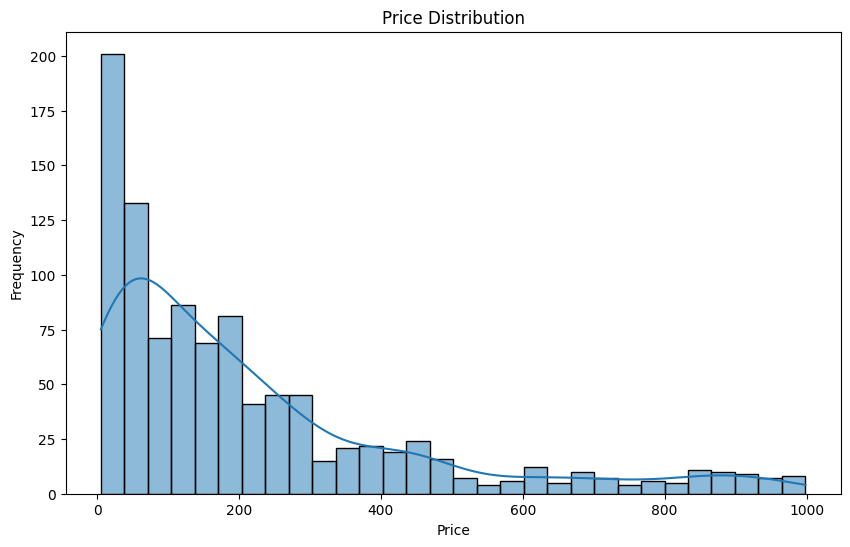

In [ ]:
# Price Distribution Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 4.2 Quantity Distribution

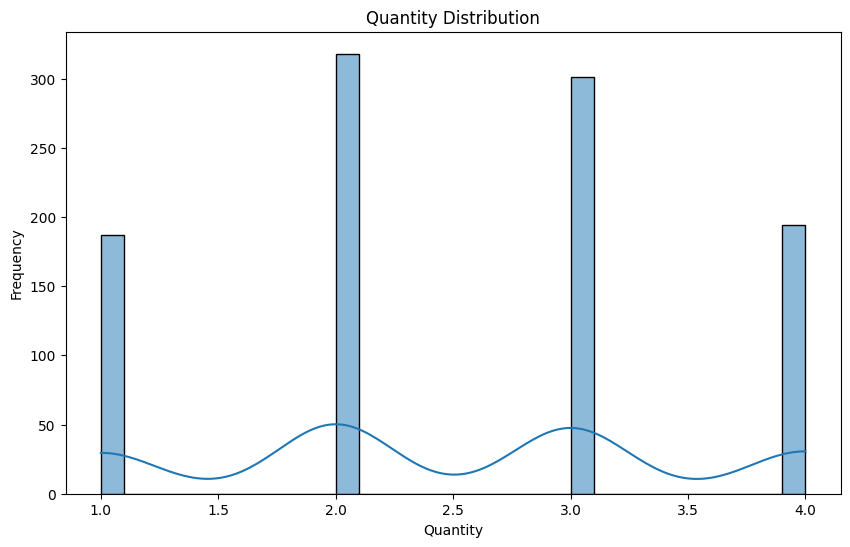

In [48]:
# Quantity Distribution Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### 4.3 Correlation Matrix

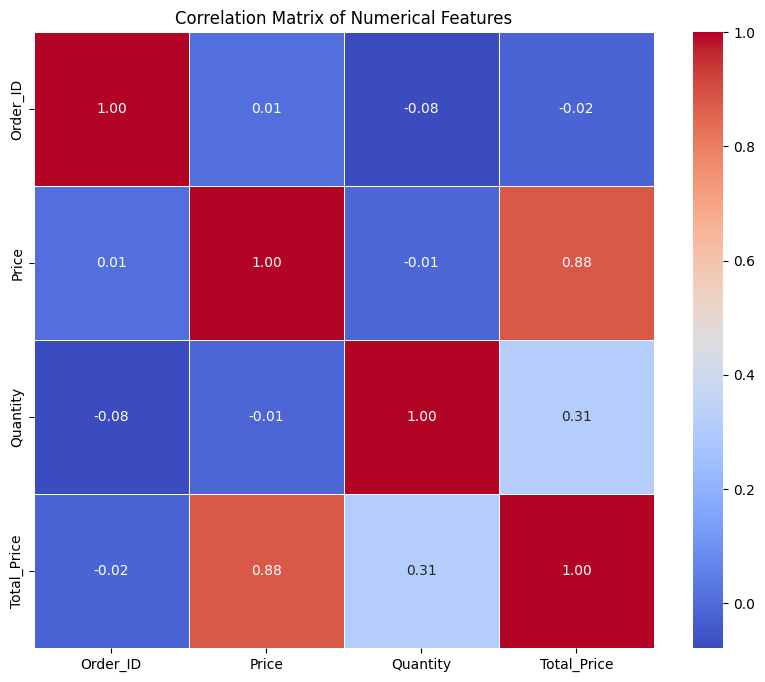

In [49]:
# Include only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 5. Machine Learning Model

Linear Regression Metrics:
Mean Squared Error (MSE): 52359.421313589475
Root Mean Squared Error (RMSE): 228.82181127154263
Mean Absolute Error (MAE): 142.06257048165526

Quadratic Regression (Degree=2) Metrics:
Mean Squared Error (MSE): 3.793190173328741e-25
Root Mean Squared Error (RMSE): 6.158888027338003e-13
Mean Absolute Error (MAE): 4.454125956954158e-13

Cubic Regression (Degree=3) Metrics:
Mean Squared Error (MSE): 7.512231365871233e-25
Root Mean Squared Error (RMSE): 8.667312943393259e-13
Mean Absolute Error (MAE): 5.736477959317199e-13


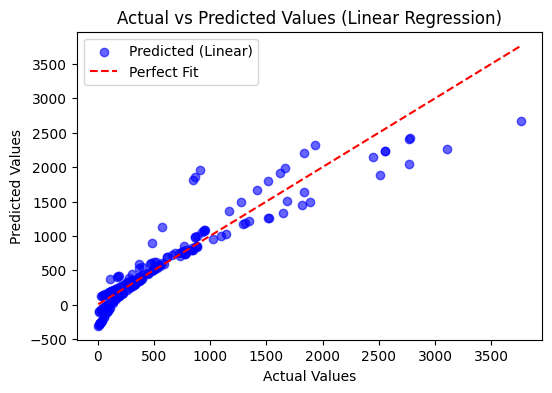

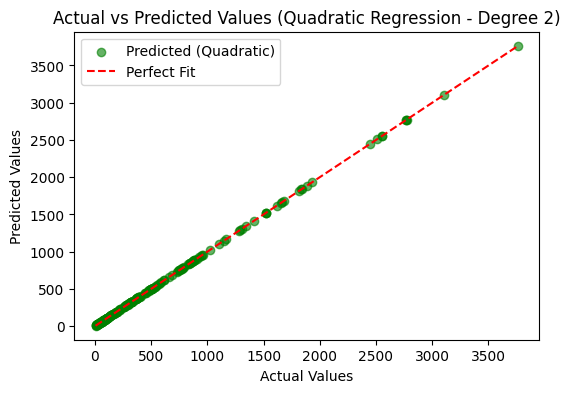

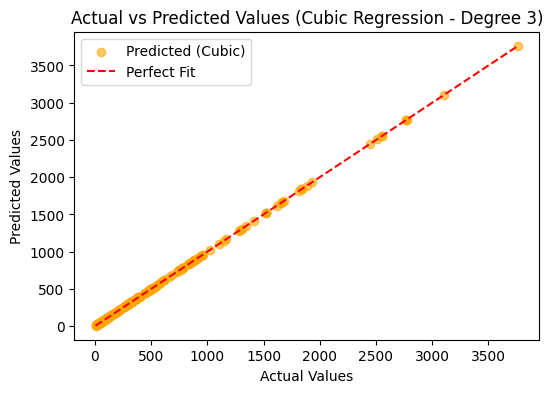

In [39]:
# Select the features and target
X = df[['Price', 'Quantity']]  # Correct way to select multiple columns
y = df['Total_Price']

# Optional: Scale the features (standardize them)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling features

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
# Initialize the linear regression model
linear_model = LinearRegression()

# Train the linear regression model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Print the linear regression evaluation metrics
print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"Mean Absolute Error (MAE): {mae_linear}")

# --- Quadratic Regression (Polynomial Degree = 2) ---
# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  # Transform the features for training
X_test_poly = poly.transform(X_test)  # Transform the features for testing

# Initialize the linear regression model
poly_model = LinearRegression()

# Train the polynomial regression model
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Print the quadratic regression (polynomial degree=2) evaluation metrics
print("\nQuadratic Regression (Degree=2) Metrics:")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly}")
print(f"Mean Absolute Error (MAE): {mae_poly}")

# --- Polynomial Regression (Higher Degree) ---
# You can experiment with different degrees. For example, degree=3 for cubic regression:
poly_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_3.fit_transform(X_train)
X_test_poly_3 = poly_3.transform(X_test)

# Initialize the linear regression model
poly_model_3 = LinearRegression()

# Train the cubic regression model
poly_model_3.fit(X_train_poly_3, y_train)

# Make predictions on the test set
y_pred_poly_3 = poly_model_3.predict(X_test_poly_3)

# Evaluate the model
mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
rmse_poly_3 = np.sqrt(mse_poly_3)
mae_poly_3 = mean_absolute_error(y_test, y_pred_poly_3)

# Print the cubic regression (polynomial degree=3) evaluation metrics
print("\nCubic Regression (Degree=3) Metrics:")
print(f"Mean Squared Error (MSE): {mse_poly_3}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly_3}")
print(f"Mean Absolute Error (MAE): {mae_poly_3}")

import matplotlib.pyplot as plt

# Plot for Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted (Linear)', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

# Plot for Quadratic Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_poly, color='green', label='Predicted (Quadratic)', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Quadratic Regression - Degree 2)')
plt.legend()
plt.show()

# Plot for Cubic Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_poly_3, color='orange', label='Predicted (Cubic)', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Cubic Regression - Degree 3)')
plt.legend()
plt.show()



In [40]:
results_linear = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted (Linear)': y_pred_linear
})

results_quadratic = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted (Quadratic)': y_pred_poly
})

results_cubic = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted (Cubic)': y_pred_poly_3
})

# Print the first 10 rows for each model
print("\nActual vs Predicted Values - Linear Regression:")
print(results_linear.head(10))

print("\nActual vs Predicted Values - Quadratic Regression (Degree=2):")
print(results_quadratic.head(10))

print("\nActual vs Predicted Values - Cubic Regression (Degree=3):")
print(results_cubic.head(10))


Actual vs Predicted Values - Linear Regression:
    Actual  Predicted (Linear)
0   775.32          743.667579
1   343.22          317.817860
2  1931.26         2316.348567
3   481.61          890.780439
4   942.90         1072.508482
5   270.81          320.387424
6   881.96          855.448809
7   145.29          215.077073
8   379.20          363.098291
9   105.21          181.450250

Actual vs Predicted Values - Quadratic Regression (Degree=2):
    Actual  Predicted (Quadratic)
0   775.32                 775.32
1   343.22                 343.22
2  1931.26                1931.26
3   481.61                 481.61
4   942.90                 942.90
5   270.81                 270.81
6   881.96                 881.96
7   145.29                 145.29
8   379.20                 379.20
9   105.21                 105.21

Actual vs Predicted Values - Cubic Regression (Degree=3):
    Actual  Predicted (Cubic)
0   775.32             775.32
1   343.22             343.22
2  1931.26            19

## 6. Interpretasi Hasil Regresi
### Linear Regression:

* MSE: 49,026.02
* RMSE: 221.42
* MAE: 124.96  

Model ini menunjukkan kesalahan prediksi yang cukup besar, yang berarti hubungan antara fitur dan target tidak cukup linear.

### Quadratic Regression (Degree=2):
* MSE: 1.84e-25
* RMSE: 4.29e-13
* MAE: 2.66e-13

Model ini hampir sempurna dengan kesalahan yang sangat kecil, menunjukkan kemampuan baik dalam menangkap hubungan non-linear.

### Cubic Regression (Degree=3):
* MSE: 2.44e-24
* RMSE: 1.56e-12
* MAE: 9.27e-13

Seperti quadratic regression, hasilnya hampir sempurna, tetapi model ini lebih kompleks dan berisiko overfitting.

### Perbandingan
* **Linear Regression** lebih sederhana, tetapi memiliki kesalahan yang lebih besar.
* **Quadratic Regression** memberikan hasil terbaik dengan kesalahan sangat kecil, ideal untuk menangkap hubungan non-linear tanpa overfitting.
* **Cubic Regression** juga sangat baik, tetapi lebih kompleks dan dapat overfit jika data terbatas.